In [2]:
import pandas as pd
import glob
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

## Setup

In [2]:
# ## boise river
# path = '/home/naheemadebisi/PhD/snow-analytics/Radar-Backscatter/uavsar_pits/boise_river'
# all_files = glob.glob(os.path.join(path, "*.csv"))
# boise_river = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

# ## frazer
# path = '/home/naheemadebisi/PhD/snow-analytics/Radar-Backscatter/uavsar_pits/frazer'
# all_files = glob.glob(os.path.join(path, "*.csv"))
# frazer = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

# ## grmesa
# path = '/home/naheemadebisi/PhD/snow-analytics/Radar-Backscatter/uavsar_pits/grmesa'
# all_files = glob.glob(os.path.join(path, "*.csv"))
# grmesa = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

# ## rockymountains
# path = '/home/naheemadebisi/PhD/snow-analytics/Radar-Backscatter/uavsar_pits/rockymountains'
# all_files = glob.glob(os.path.join(path, "*.csv"))
# rockymountains = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

# ## saltlake
# path = '/home/naheemadebisi/PhD/snow-analytics/Radar-Backscatter/uavsar_pits/saltlake'
# all_files = glob.glob(os.path.join(path, "*.csv"))
# saltlake = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

# ##east river
# path = '/home/naheemadebisi/PhD/snow-analytics/Radar-Backscatter/uavsar_pits/eastriver'
# all_files = glob.glob(os.path.join(path, "*.csv"))
# eastriver = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

# ## america river basin
# path = '/home/naheemadebisi/PhD/snow-analytics/Radar-Backscatter/uavsar_pits/ame_river_basin'
# all_files = glob.glob(os.path.join(path, "*.csv"))
# americariver = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

# #all 6 locations
# bfgrs = pd.concat([boise_river, frazer, grmesa, rockymountains, saltlake, eastriver, americariver], ignore_index= True)



In [13]:
#read all csv file in the uavsar_pits dir
path = '/home/naheemadebisi/PhD/snow-analytics/Radar-Backscatter/uavsar_pits'
all_files= glob.glob(os.path.join(path, '*', "*.csv"))
uavsar_pits = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)
uavsar_pits = uavsar_pits[['Location', 'PitID', 'Density Mean (kg/m^3)', 'Snow Depth (cm)', 'SWE (mm)', 'HH', 'HV', 'VH', 'VV']]
uavsar_pits

,Location,PitID,Density Mean (kg/m^3),Snow Depth (cm),SWE (mm),HH,HV,VH,VV
0,Boise River Basin,IDBRBL_20210127_1330,291.5,122.0,356.5,0.104028,0.101899,0.097273,0.116420
1,Boise River Basin,IDBRBT_20210127_1500,292.5,69.0,202.0,0.415091,0.119713,0.097183,0.217637
2,Boise River Basin,IDBRLO_20210126_1205,292.0,78.0,227.5,0.163230,0.044706,0.053978,0.143295
3,Boise River Basin,IDBRLT_20210126_1335,248.0,22.0,55.0,0.243080,0.121562,0.119280,0.257768
4,Boise River Basin,IDBRBS_20210128_1200,252.5,141.0,355.0,0.367296,0.087664,0.057098,0.177950
...,...,...,...,...,...,...,...,...,...
281,Senator Beck,COSBSA_20210127_1210,236.0,127.0,300.0,0.156946,0.038421,0.036239,0.141845
282,Senator Beck,COSBSA_20210317_1241,283.0,192.0,544.5,0.149433,0.045109,0.052350,0.127968
283,Senator Beck,COSBSA_20210317_1018,135.0,188.0,254.0,0.149433,0.045109,0.052350,0.127968
284,Senator Beck,COSBSA_20210310_1322,310.5,158.0,491.0,0.217294,0.044286,0.047237,0.211791


In [14]:
# Read and concat the SWE files with Temp files for 2020 and 2021.
SWE_2020 = pd.read_csv('/home/naheemadebisi/PhD/snow-analytics/Radar-Backscatter/pits_data/2020/SNEX20_TS_SP_preliminary_v6/SNEX20_TS_SP_Summary_SWE_v01_temp.csv')
SWE_2021 = pd.read_csv('/home/naheemadebisi/PhD/snow-analytics/Radar-Backscatter/pits_data/2021/SNEX21_TS_SP_preliminary_v1/SNEX21_TS_SP_Summary_SWE_v01_temp.csv')
SWE = pd.concat([SWE_2020, SWE_2021])

#merge SWE with temp column with uavsar_pits
uavsar_pits = uavsar_pits.merge(SWE[['PitID','Temp_mean',]], on = 'PitID')
uavsar_pits

,Location,PitID,Density Mean (kg/m^3),Snow Depth (cm),SWE (mm),HH,HV,VH,VV,Temp_mean
0,Boise River Basin,IDBRBL_20210127_1330,291.5,122.0,356.5,0.104028,0.101899,0.097273,0.116420,-3.500000
1,Boise River Basin,IDBRBT_20210127_1500,292.5,69.0,202.0,0.415091,0.119713,0.097183,0.217637,NaN
2,Boise River Basin,IDBRLO_20210126_1205,292.0,78.0,227.5,0.163230,0.044706,0.053978,0.143295,-2.755556
3,Boise River Basin,IDBRLT_20210126_1335,248.0,22.0,55.0,0.243080,0.121562,0.119280,0.257768,-2.000000
4,Boise River Basin,IDBRBS_20210128_1200,252.5,141.0,355.0,0.367296,0.087664,0.057098,0.177950,-3.913333
...,...,...,...,...,...,...,...,...,...,...
281,Senator Beck,COSBSA_20210303_1305,303.0,145.0,439.0,0.228256,0.067750,0.060650,0.208844,-3.487500
282,Senator Beck,COSBSA_20210127_1210,236.0,127.0,300.0,0.156946,0.038421,0.036239,0.141845,-5.614286
283,Senator Beck,COSBSA_20210317_1241,283.0,192.0,544.5,0.149433,0.045109,0.052350,0.127968,-2.757143
284,Senator Beck,COSBSA_20210310_1322,310.5,158.0,491.0,0.217294,0.044286,0.047237,0.211791,-3.123529


## plot correlation matrix

In [15]:
uavsar_pits.rename(columns={'Density Mean (kg/m^3)' : 'Density (kg/m^3)', 'Temp_mean' : 'Temp (C)'}, inplace= True)

<AxesSubplot:>

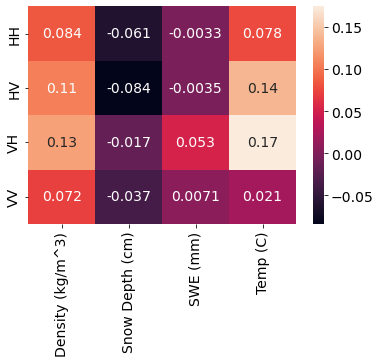

In [16]:
#fig, ax = plt.subplots(figsize = (12,12), constrained_layout = True)
#sns.set(font_scale=2)
corr_matrix = uavsar_pits.corr()
corr_matrix = corr_matrix.drop(columns= ['HH', 'HV', 'VH', 'VV']).loc[['HH', 'HV', 'VH', 'VV'] , :]
sns.heatmap(corr_matrix, annot=True)
# plt.show()

In [125]:
corr_matrix

,Density (kg/m^3),Snow Depth (cm),SWE (mm),Temp (C)
HH,0.180002,-0.047722,0.037212,0.176447
HV,0.262617,-0.126884,0.010621,0.368209
VH,0.263210,-0.020775,0.094391,0.368104
VV,0.106518,-0.069298,-0.011423,0.125096


In [17]:
from scipy.stats import pearsonr
import pandas as pd

def calculate_pvalues(df):
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            tmp = df[df[r].notnull() & df[c].notnull()]
            pvalues[r][c] = round(pearsonr(tmp[r], tmp[c])[1], 4)
    return pvalues

In [18]:
calculate_pvalues(uavsar_pits[['HH', 'HV', 'VH', 'VV', 'Density (kg/m^3)', 'Snow Depth (cm)', 'SWE (mm)', 'Temp (C)']]) 

,HH,HV,VH,VV,Density (kg/m^3),Snow Depth (cm),SWE (mm),Temp (C)
HH,0.0,0.0,0.0,0.0,0.1633,0.3147,0.9564,0.2099
HV,0.0,0.0,0.0,0.0,0.0809,0.1644,0.9542,0.024
VH,0.0,0.0,0.0,0.0,0.0373,0.7773,0.3805,0.0045
VV,0.0,0.0,0.0,0.0,0.2313,0.5404,0.9069,0.7375
Density (kg/m^3),0.1633,0.0809,0.0373,0.2313,0.0,0.0,0.0,0.0
Snow Depth (cm),0.3147,0.1644,0.7773,0.5404,0.0,0.0,0.0,0.0087
SWE (mm),0.9564,0.9542,0.3805,0.9069,0.0,0.0,0.0,0.0
Temp (C),0.2099,0.024,0.0045,0.7375,0.0,0.0087,0.0,0.0


# Modelling

In [128]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sps
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor


from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

from sklearn.tree import plot_tree, export_text

from pprint import pprint

## Setup

In [135]:
bfgrs.dropna(inplace=True)
bfgrs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74 entries, 0 to 76
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Location          74 non-null     object 
 1   PitID             74 non-null     object 
 2   Density (kg/m^3)  74 non-null     float64
 3   Snow Depth (cm)   74 non-null     float64
 4   SWE (mm)          74 non-null     float64
 5   HH                74 non-null     float64
 6   HV                74 non-null     float64
 7   VH                74 non-null     float64
 8   VV                74 non-null     float64
 9   Temp (C)          74 non-null     float64
dtypes: float64(8), object(2)
memory usage: 6.4+ KB


In [136]:
#input and output data
input_col = ['Density (kg/m^3)', 'Snow Depth (cm)', 'SWE (mm)', 'Temp (C)']
output_col = 'HH'

inputs = bfgrs[input_col]
target = bfgrs[output_col]
#transform numerical columns
scaler = StandardScaler()
scaler.fit(inputs)
inputs_scaled = scaler.transform(inputs)

#train-test split
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs_scaled, target, test_size=0.3)

## Fit  a Linear Regression model using SKlearn

In [137]:

#fit a model to the data
lnr_model = LinearRegression().fit(inputs_train, targets_train)

#predict
predictions_test = lnr_model.predict(inputs_test)

#compute loss
mse_loss = mse(targets_test, predictions_test)
rsquare = r2_score(targets_test, predictions_test) 
print(f'Test mse: {mse_loss}')
print(f'Test r_square: {rsquare}')

Test mse: 0.012213140825567109
Test r_square: -0.15941212893843115


In [138]:
weights_df = pd.DataFrame({
    'feature': input_col,
    'weight': lnr_model.coef_
})
weights_df.sort_values('weight', ascending=False)

,feature,weight
2,SWE (mm),0.049683
3,Temp (C),0.028590
0,Density (kg/m^3),-0.026098
1,Snow Depth (cm),-0.048570


In [140]:
def build_model(model, input_train = inputs_train, target_train = targets_train, input_test = inputs_test, target_test = targets_test):
    #fit a model on training data
    model_fit = model.fit(input_train, target_train)
    
    #predict train
    predictions_train = model_fit.predict(input_train)
    #predict test
    predictions_test = model_fit.predict(input_test)

    #compute loss train
    mse_loss = mse(target_train, predictions_train)
    rsquare = r2_score(target_train, predictions_train) 
    print(f'Train mse: {mse_loss}')
    print(f'Train r_square: {rsquare}')

    #compute loss test
    mse_loss = mse(target_test, predictions_test)
    rsquare = r2_score(target_test, predictions_test) 
    print(f'Test mse: {mse_loss}')
    print(f'Test r_square: {rsquare}')

    return model_fit

def feature_importance(fitted_model):
    #feature importance
    importance_df = pd.DataFrame({
    'feature': bfgrs[input_col].columns,
    'importance': fitted_model.feature_importances_
    }).sort_values('importance', ascending=False)

    plt.title('Feature Importance')
    sns.barplot(data=importance_df.head(10), x='importance', y='feature');



In [141]:
DT = build_model(DecisionTreeRegressor())

Train mse: 0.0
Train r_square: 1.0
Test mse: 0.018966862087697135
Test r_square: -0.8005532128429742


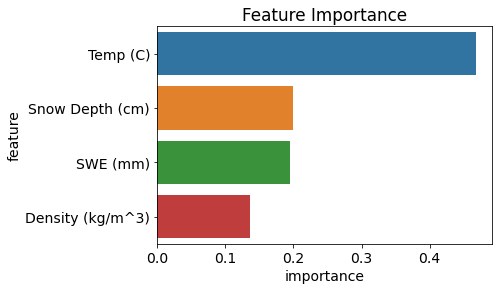

In [142]:
feature_importance(DT)

In [143]:
RF = build_model(RandomForestRegressor())

Train mse: 0.0016049010452981976
Train r_square: 0.8242138859992258
Test mse: 0.011028059774195829
Test r_square: -0.04691057308486801


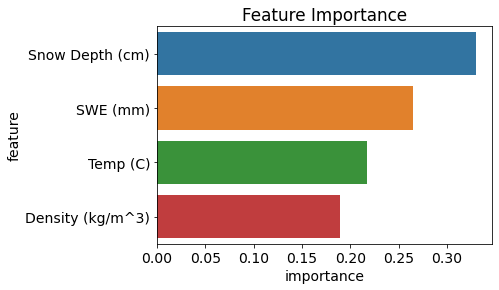

In [144]:
feature_importance(RF)

In [145]:
# Number of trees in random forest-> 10 values between 0 and 2000
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 2000, num = 10)]

# Maximum number of depth and leaf nodes in tree
max_depth = [int(x) for x in np.linspace(1, 110, num = 10)]
max_depth.append(None)

max_leaf_nodes = [int(x) for x in np.linspace(1, 200, num = 10)]
max_leaf_nodes.append(None)

# Number of features to consider at every split
max_features = ['sqrt', 'log2', None]

# Minimum number of samples split and sample leaf required to split a node
min_samples_split = [2, 5, 10,15]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 8, 10]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
                'max_depth': max_depth,
                'max_leaf_nodes' : max_leaf_nodes,
               'max_features': max_features,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [1, 13, 25, 37, 49, 61, 73, 85, 97, 110, None],
 'max_features': ['sqrt', 'log2', None],
 'max_leaf_nodes': [1, 23, 45, 67, 89, 111, 133, 155, 177, 200, None],
 'min_samples_leaf': [1, 2, 4, 8, 10],
 'min_samples_split': [2, 5, 10, 15],
 'n_estimators': [10, 231, 452, 673, 894, 1115, 1336, 1557, 1778, 2000]}


In [146]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
RF2 = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = RF2, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(inputs_train, targets_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=False, max_depth=97, max_features=None, max_leaf_nodes=None, min_samples_leaf=8, min_samples_split=5, n_estimators=452; total time=   0.7s
[CV] END bootstrap=False, max_depth=97, max_features=None, max_leaf_nodes=None, min_samples_leaf=8, min_samples_split=5, n_estimators=452; total time=   0.7s
[CV] END bootstrap=False, max_depth=97, max_features=None, max_leaf_nodes=None, min_samples_leaf=8, min_samples_split=5, n_estimators=452; total time=   0.8s
[CV] END bootstrap=False, max_depth=49, max_features=None, max_leaf_nodes=23, min_samples_leaf=4, min_samples_split=5, n_estimators=894; total time=   1.4s
[CV] END bootstrap=False, max_depth=49, max_features=None, max_leaf_nodes=23, min_samples_leaf=4, min_samples_split=5, n_estimators=894; total time=   1.4s
[CV] END bootstrap=False, max_depth=49, max_features=None, max_leaf_nodes=23, min_samples_leaf=4, min_samples_split=5, n_estimators=894; total time=   

/home/naheemadebisi/miniconda3/envs/earth-analytics-python/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/home/naheemadebisi/miniconda3/envs/earth-analytics-python/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/naheemadebisi/miniconda3/envs/earth-analytics-python/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 476, in fit
    trees = Parallel(
  File "/home/naheemadebisi/miniconda3/envs/earth-analytic

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [1, 13, 25, 37, 49, 61, 73,
                                                      85, 97, 110, None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'max_leaf_nodes': [1, 23, 45, 67, 89,
                                                           111, 133, 155, 177,
                                                           200, None],
                                        'min_samples_leaf': [1, 2, 4, 8, 10],
                                        'min_samples_split': [2, 5, 10, 15],
                                        'n_estimators': [10, 231, 452, 673, 894,
                                                         1115, 1336, 1557, 1778,
                                                         2000]},
                   random_state=42, verbose=2)

In [147]:
#predict train
predictions_train = rf_random.best_estimator_.predict(inputs_train)
#predict test
predictions_test = rf_random.best_estimator_.predict(inputs_test)

#compute loss train
mse_loss = mse(targets_train, predictions_train)
rsquare = r2_score(targets_train, predictions_train) 
print(f'Train mse: {mse_loss}')
print(f'Train r_square: {rsquare}')

#compute loss test
mse_loss = mse(targets_test, predictions_test)
rsquare = r2_score(targets_test, predictions_test) 
print(f'Test mse: {mse_loss}')
print(f'Test r_square: {rsquare}')

Train mse: 0.006577118688856182
Train r_square: 0.2796028521365478
Test mse: 0.011193606356666812
Test r_square: -0.06262616323178283


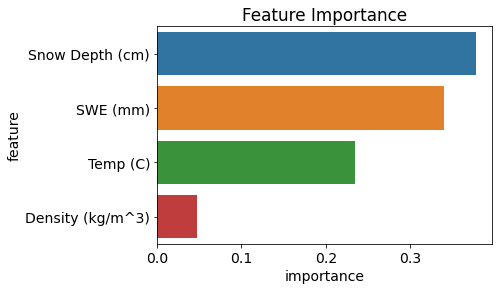

In [148]:
feature_importance(rf_random.best_estimator_)

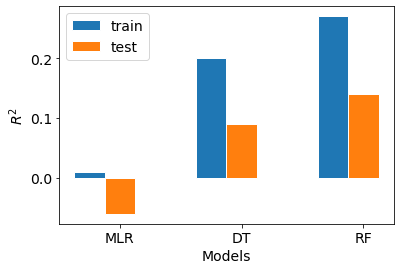

In [34]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bars
barWidth = 0.25
 
# set heights of bars
bars1 = [0.01, 0.20, 0.27]
bars2 = [-0.06, 0.09, 0.14]

 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

 
# Make the plot
plt.bar(r1, bars1, color='C0', width=barWidth, edgecolor='white', label='train')
plt.bar(r2, bars2, color='C1', width=barWidth, edgecolor='white', label='test')

 
# Add xticks on the middle of the group bars
plt.xlabel('Models')
plt.ylabel('$R^2$')
plt.xticks([r + barWidth for r in range(len(bars1))], ['MLR', 'DT', 'RF'])
 
# Create legend & Show graphic
plt.legend()
plt.show()

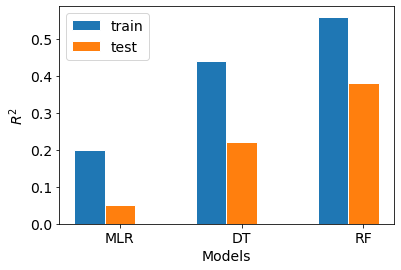

In [35]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bars
barWidth = 0.25
 
# set heights of bars
bars1 = [0.20, 0.44, 0.56]
bars2 = [0.05, 0.22, 0.38]

 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

 
# Make the plot
plt.bar(r1, bars1, color='C0', width=barWidth, edgecolor='white', label='train')
plt.bar(r2, bars2, color='C1', width=barWidth, edgecolor='white', label='test')

 
# Add xticks on the middle of the group bars
plt.xlabel('Models')
plt.ylabel('$R^2$')
plt.xticks([r + barWidth for r in range(len(bars1))], ['MLR', 'DT', 'RF'])
 
# Create legend & Show graphic
plt.legend()
plt.show()